<a href="https://www.kaggle.com/code/hoshimmardonov1/customer-churn?scriptVersionId=125520485" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

<h1>Classification</h1>

We read the data

In [2]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

The dataset consists of 20 columns. What each column means is stored on a different page of the above Excel file.

In [4]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description.Discerption.to_numpy()

array(['Unique customer ID', 'Churn Flag',
       'Tenure of customer in organization',
       'Preferred login device of customer', 'City tier',
       'Distance in between warehouse to home of customer',
       'Preferred payment method of customer', 'Gender of customer',
       'Number of hours spend on mobile application or website',
       'Total number of deceives is registered on particular customer',
       'Preferred order category of customer in last month',
       'Satisfactory score of customer on service',
       'Marital status of customer',
       'Total number of added added on particular customer',
       'Any complaint has been raised in last month',
       'Percentage increases in order from last year',
       'Total number of coupon has been used in last month',
       'Total number of orders has been places in last month',
       'Day Since last order by customer',
       'Average cashback in last month'], dtype=object)

*  Unique customer ID - mijoz ID raqami 
*  Churn Flag - qaytish bayrog'i
*  Tenure of customer in organization - Tashkilotda mijozning amal qilish muddati
*  Preferred login device of customer - Mijozning afzal ko'rgan kirish qurilmasi
*  City tier - Shahar darajasi
*  Distance in between warehouse to home of customer - Ombordan mijozning uyigacha bo'lgan masofa
*  Preferred payment method of customer - Mijozning afzal ko'rgan to'lov usuli
*  Gender of customer - Mijozning jinsi
*  Number of hours spend on mobile application or website - Mobil ilova yoki veb-saytga sarflangan soatlar soni
*  Total number of deceives is registered on particular customer - Aldashlarning umumiy soni ma'lum bir mijoz bo'yicha qayd etilgan
*  Preferred order category of customer in last month - O'tgan oyda mijozning afzal ko'rgan buyurtma toifasi
*  Satisfactory score of customer on service - Xizmat ko'rsatish bo'yicha mijozning qoniqarli balli
*  Marital status of customer - Mijozning oilaviy holati
*  Total number of added added on particular customer - Muayyan mijozga qo'shilganlarning umumiy soni
*  Any complaint has been raised in last month - O'tgan oyda har qanday shikoyat kelib tushdi
*  Percentage increases in order from last year - O'tgan yilga nisbatan foiz ortib bormoqda
*  Total number of coupon has been used in last month - Kuponning umumiy soni oxirgi oyda ishlatilgan
*  Total number of orders has been places in last month - O'tgan oyda berilgan buyurtmalarning umumiy soni
*  Day Since last order by customer - Mijoz tomonidan oxirgi buyurtma berilgan kundan boshlab
*  Average cashback in last month - O'tgan oydagi o'rtacha naqd pul

<h3>Analyze the data</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


An important column for us is the Churn column, it is this column that acts as a label (that is, a predicted class).

Let's see the ratio of values in this column:

In [7]:
df['Churn'].value_counts() / len(df) * 100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

* 4682 customers repurchased (remaining)
* 948 customers left

We derive the ratio:

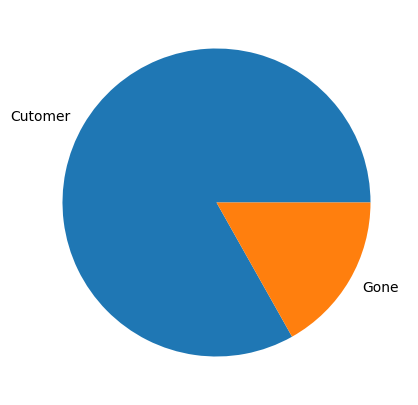

In [8]:
churn_rate = df['Churn'].value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Cutomer', 'Gone'])
plt.show()

Let's analyze some numerical columns

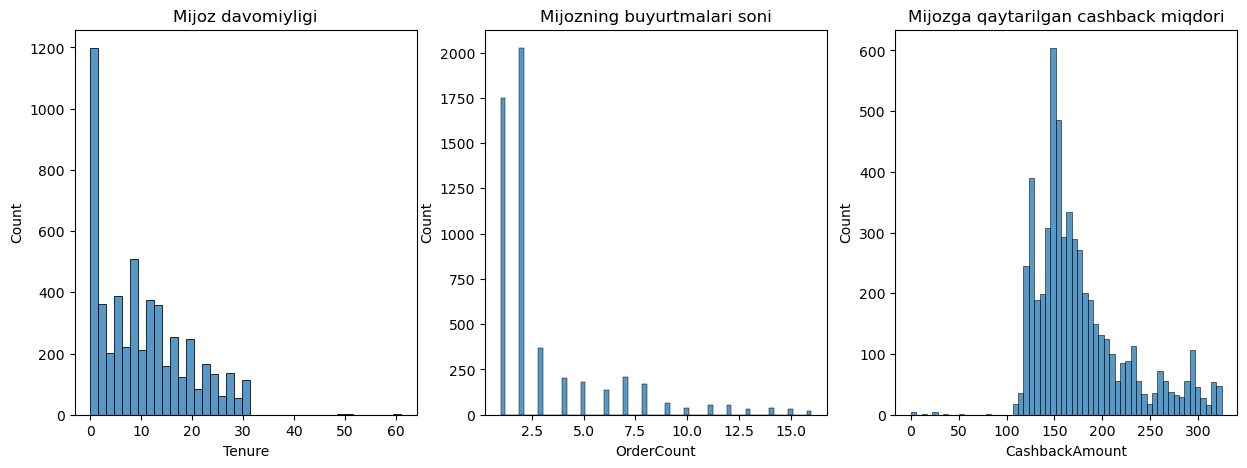

In [9]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

We analyze categorical columns

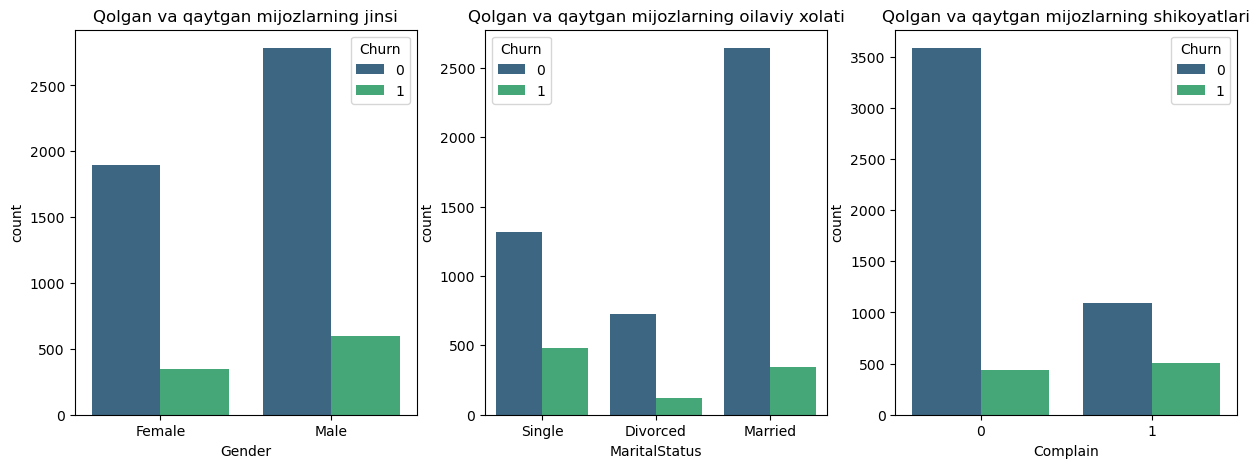

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozlarning shikoyatlari")

plt.show()

In [11]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

<h3>Data processing</h3>

In [12]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")

missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")

print(f"Mavjud bo'lmagan qatorlar: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar: 33.0%


Let's sort some categorical columns with high correlation

In [13]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','NumberOfDeviceRegistered','SatisfactionScore','MaritalStatus','Gender']]

In [14]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar: 10.0%


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
data_num = data[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','NumberOfDeviceRegistered','SatisfactionScore']]

In [17]:
imputer.fit(data_num)
X = imputer.transform(data_num)

In [18]:
data_numtr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [19]:
data_numtr["MaritalStatus"] = data["MaritalStatus"]
data_numtr["Gender"] = data["Gender"]
data_numtr.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Gender
0,1.0,4.0,1.0,5.0,159.93,3.0,2.0,Single,Female
1,1.0,9.0,1.0,0.0,120.90,4.0,3.0,Single,Male
2,1.0,9.0,1.0,3.0,120.28,4.0,3.0,Single,Male
3,1.0,0.0,0.0,3.0,134.07,4.0,5.0,Single,Male
4,1.0,0.0,0.0,3.0,129.60,3.0,5.0,Single,Male


Preparation for ML

In [20]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(data_numtr)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1.0,4.0,1.0,5.0,159.93,3.0,2.0,0,0,1,1,0
1,1.0,9.0,1.0,0.0,120.90,4.0,3.0,0,0,1,0,1
2,1.0,9.0,1.0,3.0,120.28,4.0,3.0,0,0,1,0,1
3,1.0,0.0,0.0,3.0,134.07,4.0,5.0,0,0,1,0,1
4,1.0,0.0,0.0,3.0,129.60,3.0,5.0,0,0,1,0,1


In [21]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Logistic Regression

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       936
         1.0       0.71      0.39      0.51       190

    accuracy                           0.87      1126
   macro avg       0.80      0.68      0.72      1126
weighted avg       0.86      0.87      0.86      1126

Model aniqligi: 0.8712255772646537


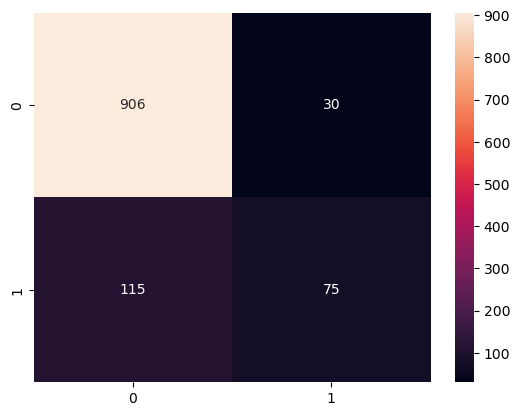

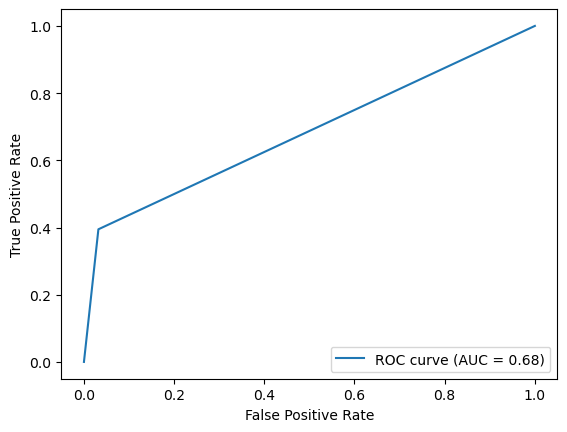

In [23]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


Support Vector Machines

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       936
         1.0       0.79      0.40      0.53       190

    accuracy                           0.88      1126
   macro avg       0.84      0.69      0.73      1126
weighted avg       0.87      0.88      0.86      1126

Model aniqligi: 0.8809946714031972


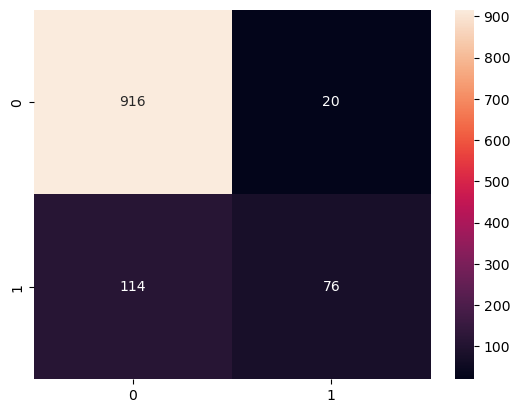

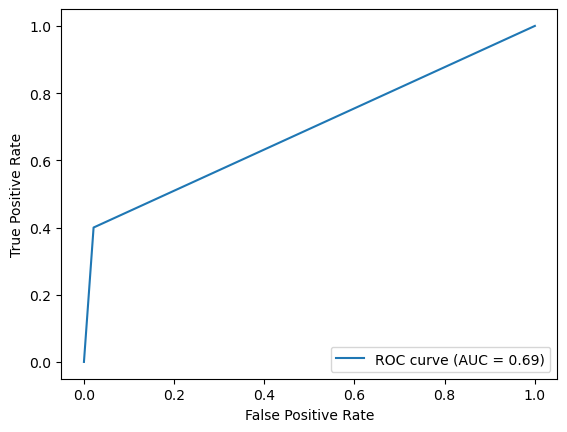

In [24]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       936
         1.0       0.82      0.81      0.81       190

    accuracy                           0.94      1126
   macro avg       0.89      0.89      0.89      1126
weighted avg       0.94      0.94      0.94      1126

Model aniqligi: 0.9378330373001776


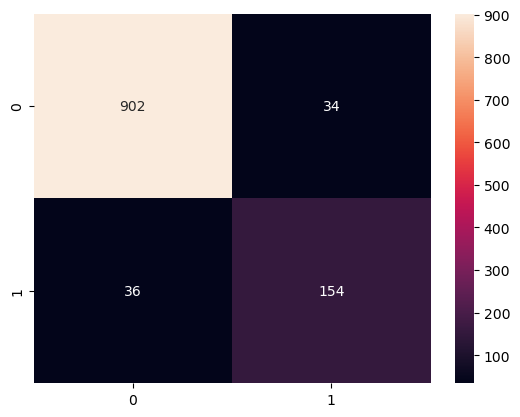

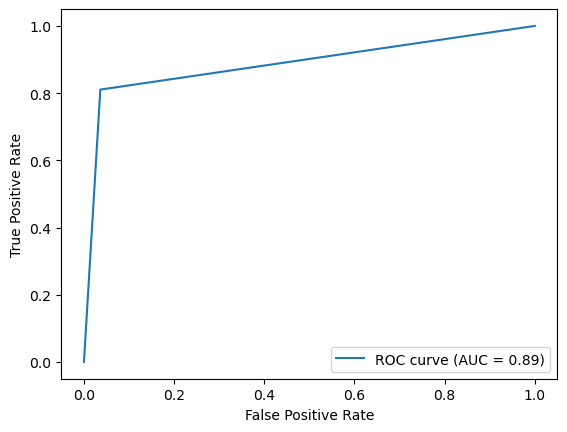

In [25]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

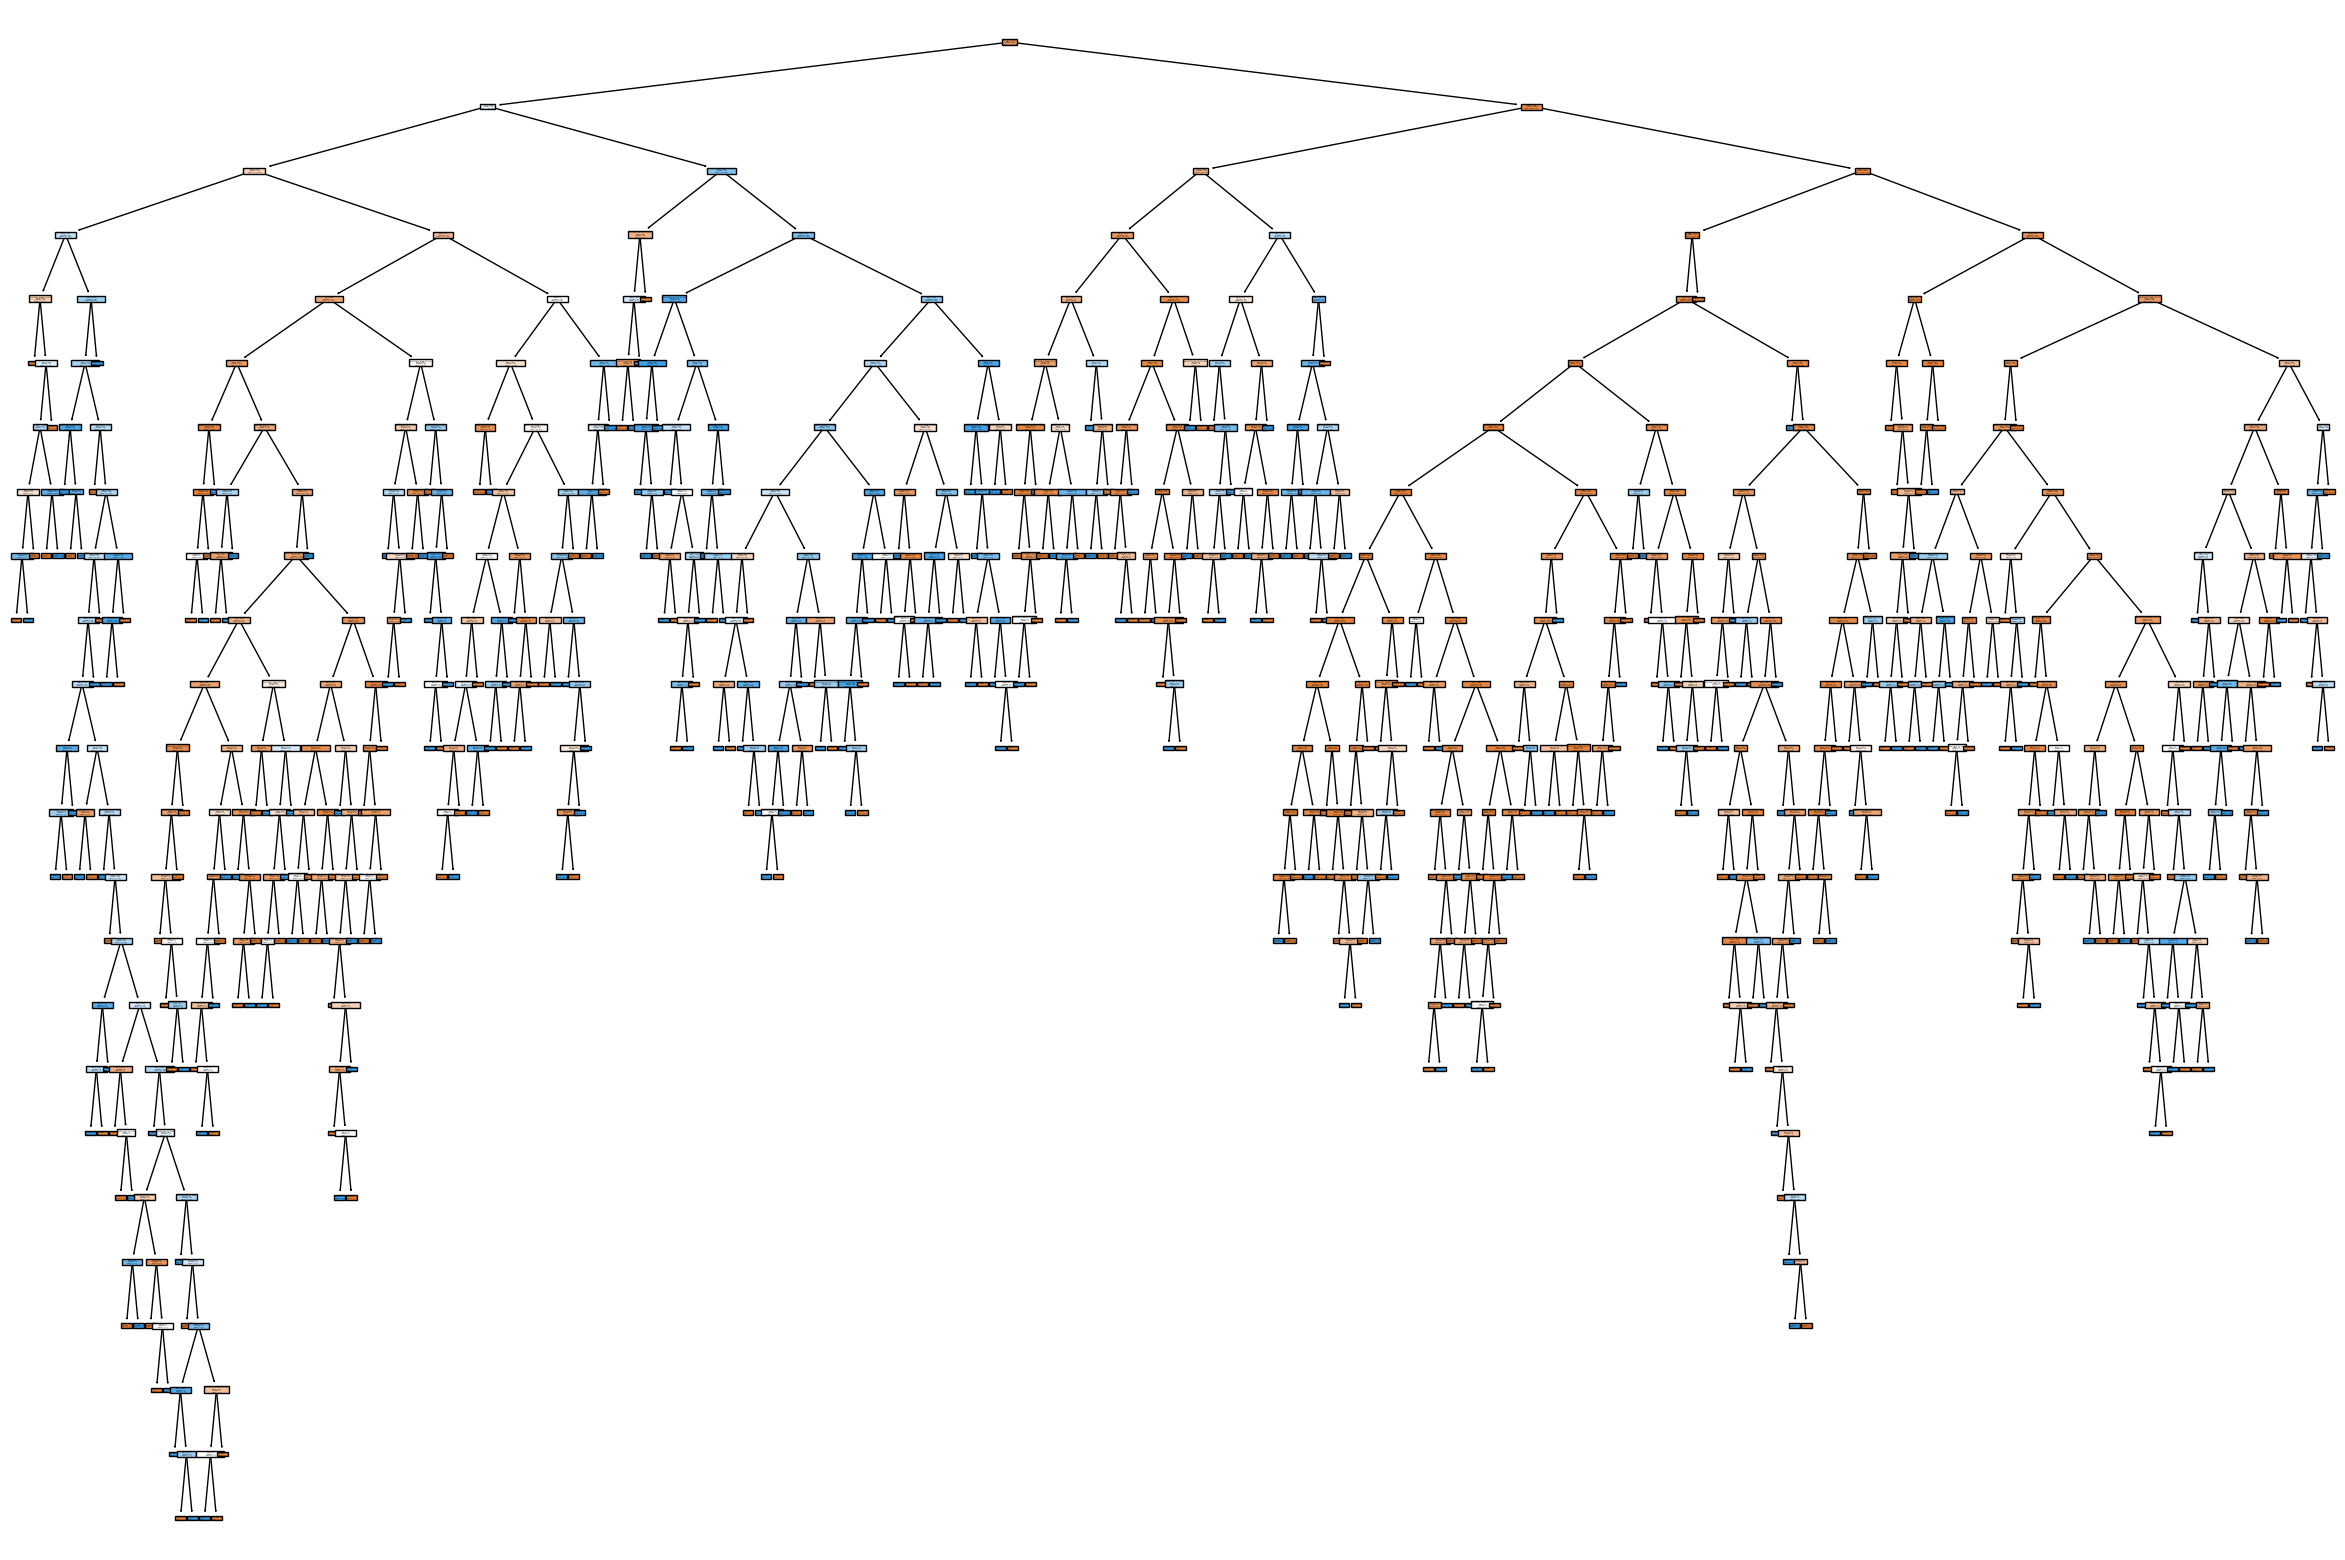

In [26]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Random Forest

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       936
         1.0       0.83      0.72      0.77       190

    accuracy                           0.93      1126
   macro avg       0.89      0.85      0.86      1126
weighted avg       0.92      0.93      0.93      1126

Model aniqligi: 0.9271758436944938


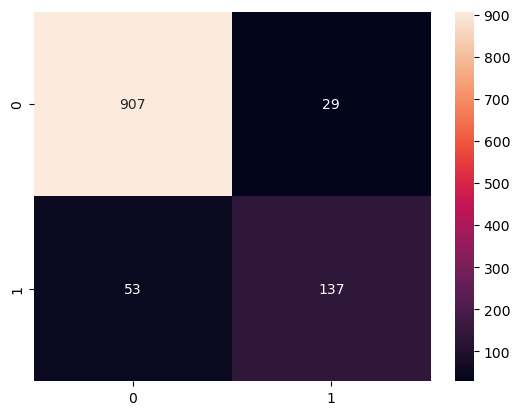

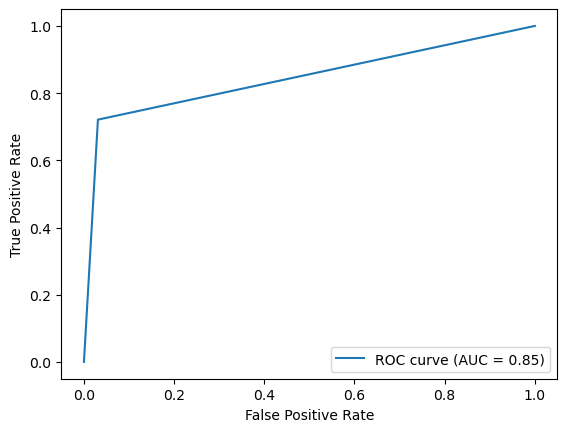

In [27]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       936
         1.0       0.90      0.81      0.85       190

    accuracy                           0.95      1126
   macro avg       0.93      0.90      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Model aniqligi: 0.9520426287744227


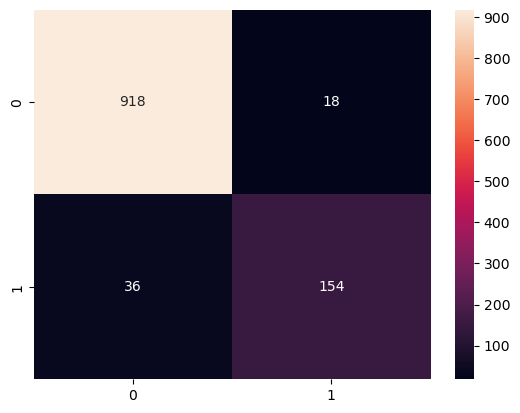

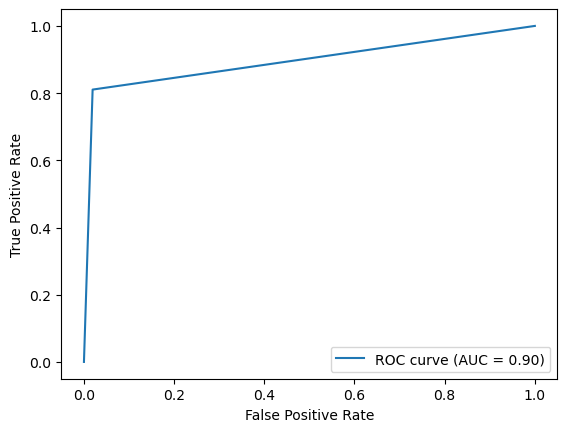

In [28]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

The End